In [1]:
from IPython.display import Image

In [1]:
from peft import PeftModel, get_peft_model, prepare_model_for_kbit_training

[2024-03-21 21:12:46,460] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)


## basics

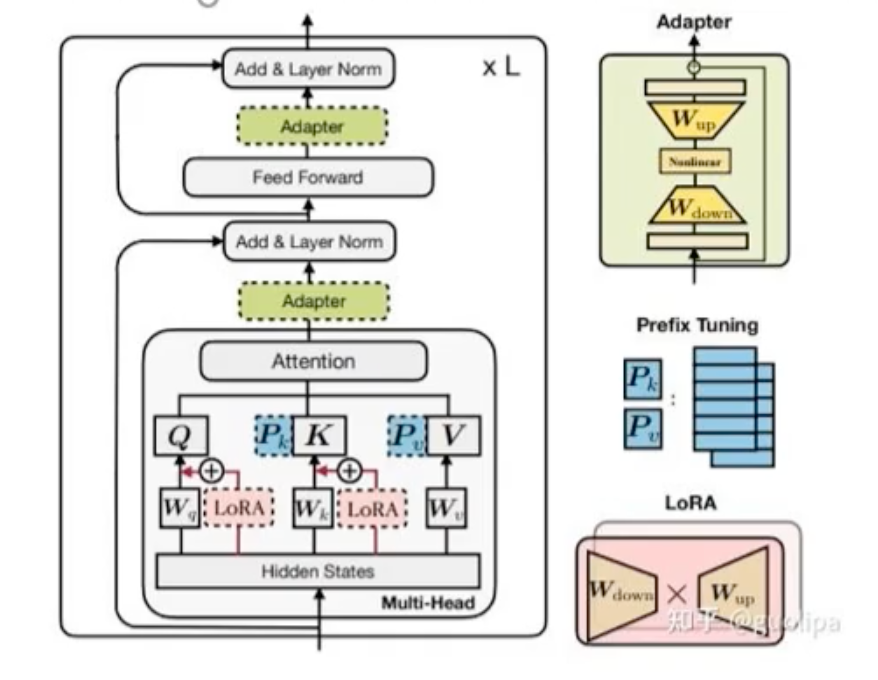

In [3]:
Image('../imgs/peft.png', width=400)

- Prefix Tuning
    - 相当于在学前缀（也就是 prompt）
- Adapter Tuning
    - 串联式的；
- LoRA
    - 也是一种 Adapter
    - 并联式的；

## lora

- https://arxiv.org/abs/2012.13255
    - We empirically show that common pre-trained models have **a very low intrinsic dimension**; 
        - in other words, there exists a low dimension reparameterization that is as effective for fine-tuning as the full parameter space.

### lora target

```
TRANSFORMERS_MODELS_TO_LORA_TARGET_MODULES_MAPPING = {
    "t5": ["q", "v"],
    "mt5": ["q", "v"],
    "bart": ["q_proj", "v_proj"],
    "gpt2": ["c_attn"],
    "bloom": ["query_key_value"],
    "blip-2": ["q", "v", "q_proj", "v_proj"],
    "opt": ["q_proj", "v_proj"],
    "gptj": ["q_proj", "v_proj"],
    "gpt_neox": ["query_key_value"],
    "gpt_neo": ["q_proj", "v_proj"],
    "bert": ["query", "value"],
    "roberta": ["query", "value"],
    "xlm-roberta": ["query", "value"],
    "electra": ["query", "value"],
    "deberta-v2": ["query_proj", "value_proj"],
    "deberta": ["in_proj"],
    "layoutlm": ["query", "value"],
    "llama": ["q_proj", "v_proj"],
    "chatglm": ["query_key_value"],
    "gpt_bigcode": ["c_attn"],
    "mpt": ["Wqkv"],
}
```

## utils

### prepare_model_for_kbit_training

- 1- Cast the layernorm in fp32 
- 2- making output embedding layer require grads 
- 3- Add the upcasting of the lm head to fp32

```
for name, param in model.named_parameters():
    # freeze base model's layers
    param.requires_grad = False
```

### get_peft_model

```
def get_peft_model(model: PreTrainedModel, peft_config: PeftConfig, adapter_name: str = "default") -> PeftModel:
```

- Returns a Peft model object from a model and a config.